In [ ]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.1 MB/s eta 0:00:00


**Reddit API Authentication**

In [ ]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="VOpGfy-fqDmZYrvUtk7F7A",
    client_secret="kFyW-w6Ll2O2ZIV4It-qGIqtv4KkbQ",
    user_agent=user_agent
)

In [ ]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

**New rising topics on selected word**

In [ ]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("billgates").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Happy Cakeday, r/billgates! Today you're 11
yksc6k
AutoModerator
1667450169.0
6
1.0
https://www.reddit.com/r/billgates/comments/yksc6k/happy_cakeday_rbillgates_today_youre_11/
0


**Selecting headlines of subreddits on selected topic**

In [ ]:
#Get total comment in Subreddit

headlines = set()
for submission in reddit.subreddit("billgates").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

504


**Creating dataset**

In [ ]:
#Create a dataframe from the scrapped data
billgates_df = pd.DataFrame(headlines)
billgates_df.head()

,0
0,Jimmy Fallon tries to hide his Mac from Bill G...
1,5 books I loved reading this year By Bill Gates
2,Looking for help in Detroit!
3,Bill Gates Is a Straight Up Savage
4,I want someone to provide any evidence that bi...


In [ ]:
df = billgates_df.iloc[:, 1:]
billgates_df.head()

,0
0,Jimmy Fallon tries to hide his Mac from Bill G...
1,5 books I loved reading this year By Bill Gates
2,Looking for help in Detroit!
3,Bill Gates Is a Straight Up Savage
4,I want someone to provide any evidence that bi...


In [ ]:
billgates_df.columns

RangeIndex(start=0, stop=1, step=1)

In [ ]:
billgates_df.columns = ['Titles']

In [ ]:
billgates_df.head()

,Titles
0,Jimmy Fallon tries to hide his Mac from Bill G...
1,5 books I loved reading this year By Bill Gates
2,Looking for help in Detroit!
3,Bill Gates Is a Straight Up Savage
4,I want someone to provide any evidence that bi...


In [ ]:
billgates_df.Titles.duplicated().sum()

0

**Cleaning headlines**

In [ ]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :

    return text

#Cleaning the text
billgates_df["Titles"]= billgates_df["Titles"].apply(cleanTxt)

#Show the clean text
billgates_df.head()

,Titles
0,Jimmy Fallon tries to hide his Mac from Bill G...
1,5 books I loved reading this year By Bill Gates
2,Looking for help in Detroit!
3,Bill Gates Is a Straight Up Savage
4,I want someone to provide any evidence that bi...


In [ ]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
billgates_df["Titles"]= billgates_df["Titles"].apply(remove_emoji)

#Show the clean text
billgates_df.head()


,Titles
0,Jimmy Fallon tries to hide his Mac from Bill G...
1,5 books I loved reading this year By Bill Gates
2,Looking for help in Detroit!
3,Bill Gates Is a Straight Up Savage
4,I want someone to provide any evidence that bi...


In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

**Getting polarity and insight**

In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
billgates_df['Subjectivity'] = billgates_df['Titles'].apply(getSubjectivity)
billgates_df['Polarity'] = billgates_df['Titles'].apply(getPolarity)

#Now display data
billgates_df.head()

,Titles,Subjectivity,Polarity
0,Jimmy Fallon tries to hide his Mac from Bill G...,0.25,-0.05
1,5 books I loved reading this year By Bill Gates,0.80,0.70
2,Looking for help in Detroit!,0.00,0.00
3,Bill Gates Is a Straight Up Savage,0.40,0.20
4,I want someone to provide any evidence that bi...,1.00,-1.00


In [ ]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

billgates_df["Insight"] = billgates_df["Polarity"].apply(getInsight)

billgates_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Jimmy Fallon tries to hide his Mac from Bill G...,0.250000,-0.050000,Negative
1,5 books I loved reading this year By Bill Gates,0.800000,0.700000,Positive
2,Looking for help in Detroit!,0.000000,0.000000,Neutral
3,Bill Gates Is a Straight Up Savage,0.400000,0.200000,Positive
4,I want someone to provide any evidence that bi...,1.000000,-1.000000,Negative
5,Story Of Bill Gates & Microsoft Empire,0.000000,0.000000,Neutral
6,Inside Bill Gates’ high-stakes quest to vaccin...,0.000000,0.000000,Neutral
7,Read World richest man bill gates wealth and f...,0.000000,0.000000,Neutral
8,Can somebody tell what shoes Bill Gates is wea...,0.000000,0.000000,Neutral
9,Bill Gates explains how he would fight coronav...,0.000000,0.000000,Neutral


In [ ]:
#Data Visualization

import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


**Visualizing sentiment score**

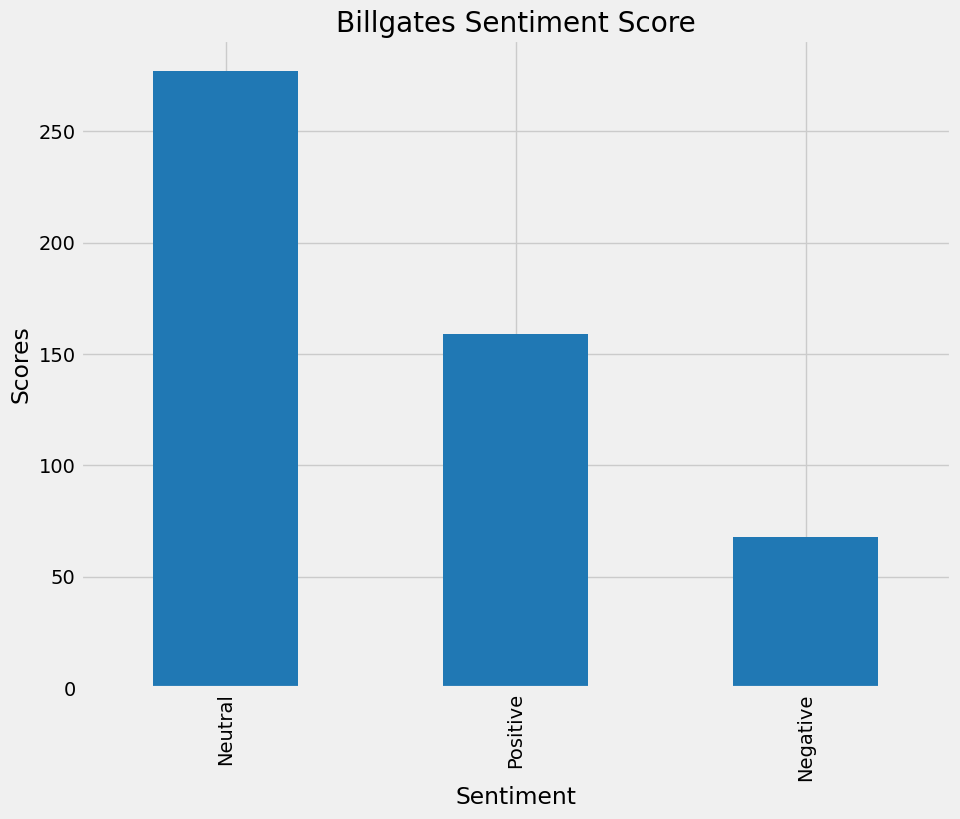

In [ ]:
#Plot the values count of sentiment
plt.title("Billgates Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
billgates_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

**Creating WordCloud**

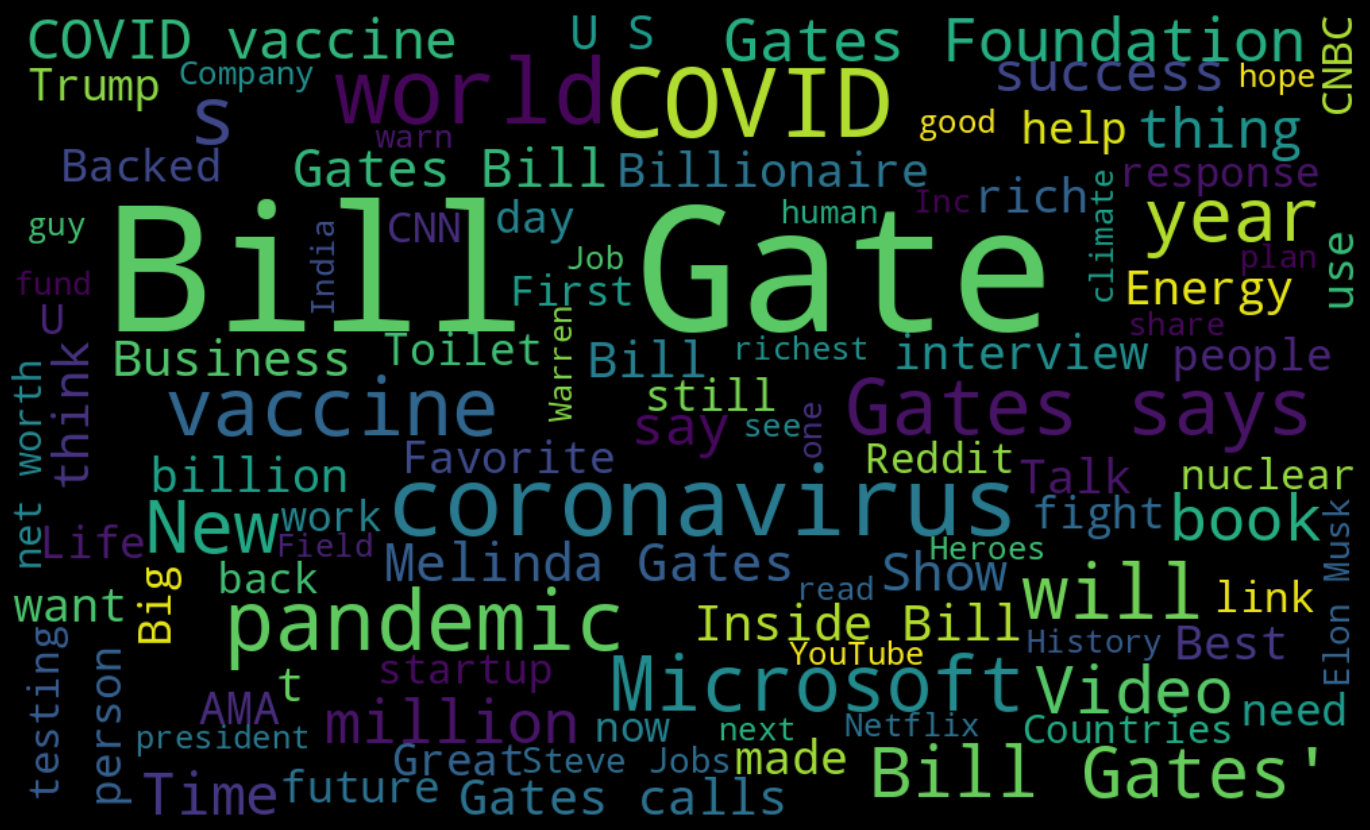

In [ ]:
#words cloud

text = ' '.join( [twts for twts in billgates_df['Titles']] ) #To join all tweet
    # generate word cloud
wordcloud = WordCloud(width=1000, height = 600,

                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");